In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
import sklearn
import scipy

In [2]:
Custs = pd.read_csv('AdvWorksCusts.csv')
MonthSpend = pd.read_csv('AW_AveMonthSpend.csv')
Buyer = pd.read_csv('AW_BikeBuyer.csv')

In [3]:
data = pd.merge(Custs, MonthSpend, how='inner', left_on='CustomerID', right_on='CustomerID')

In [4]:
data = pd.merge(data, Buyer, how='inner', left_on='CustomerID', right_on='CustomerID')
data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [5]:
data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

In [6]:
#removing personal information and unnecessary data 
not_important = ['FirstName', 'Title', 'MiddleName', 'LastName','Suffix','AddressLine1', 'AddressLine2','PostalCode','PhoneNumber']
data = data.drop(not_important, axis =1)
data.head()

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Rockhampton,Queensland,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Seaford,Victoria,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Hobart,Tasmania,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,North Ryde,New South Wales,Australia,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Wollongong,New South Wales,Australia,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


In [7]:
data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000,17209.000000
mean,20200.378523,0.672671,1.508106,0.997211,2.016096,78084.818700,72.494625,0.331513
std,5354.643340,0.469252,1.137949,1.519436,1.685089,39616.621179,27.374399,0.470771
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15531.000000,0.000000,1.000000,0.000000,0.000000,47773.000000,52.000000,0.000000
50%,20157.000000,1.000000,2.000000,0.000000,2.000000,76090.000000,68.000000,0.000000
75%,24850.000000,1.000000,2.000000,2.000000,3.000000,105065.000000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17209 entries, 0 to 17208
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            17209 non-null  int64 
 1   City                  17209 non-null  object
 2   StateProvinceName     17209 non-null  object
 3   CountryRegionName     17209 non-null  object
 4   BirthDate             17209 non-null  object
 5   Education             17209 non-null  object
 6   Occupation            17209 non-null  object
 7   Gender                17209 non-null  object
 8   MaritalStatus         17209 non-null  object
 9   HomeOwnerFlag         17209 non-null  int64 
 10  NumberCarsOwned       17209 non-null  int64 
 11  NumberChildrenAtHome  17209 non-null  int64 
 12  TotalChildren         17209 non-null  int64 
 13  YearlyIncome          17209 non-null  int64 
 14  AveMonthSpend         17209 non-null  int64 
 15  BikeBuyer             17209 non-null

In [9]:
(data.isna() == True).any()

CustomerID              False
City                    False
StateProvinceName       False
CountryRegionName       False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
dtype: bool

In [10]:
#check for duplicates
print(data['CustomerID'].shape[0])
print(data['CustomerID'].unique().shape[0])
data[data.duplicated()].head()

17209
16404


,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
33,15127,Lane Cove,New South Wales,Australia,1975-02-14,Bachelors,Professional,M,S,0,2,0,0,129497,73,1
34,15127,Lane Cove,New South Wales,Australia,1975-02-14,Bachelors,Professional,M,S,0,2,0,0,129497,73,1
35,15127,Lane Cove,New South Wales,Australia,1975-02-14,Bachelors,Professional,M,S,0,2,0,0,129497,73,1
36,15127,Lane Cove,New South Wales,Australia,1975-02-14,Bachelors,Professional,M,S,0,2,0,0,129497,73,1
37,15127,Lane Cove,New South Wales,Australia,1975-02-14,Bachelors,Professional,M,S,0,2,0,0,129497,73,1


In [11]:
data.drop_duplicates(subset='CustomerID', keep='last', inplace=True)

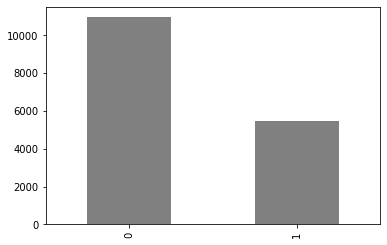

In [12]:
#check for class imbalance
data['BikeBuyer'].value_counts().plot.bar(color = 'grey')

In [13]:
#Changing date of birth to age 
DOB = pd.to_datetime(data['BirthDate'])
date = datetime.date(1998, 1, 1)
Age = DOB.apply(lambda x: date - x.date())
Age = Age.apply(lambda x : int(x.days/365))
data['Age'] = Age

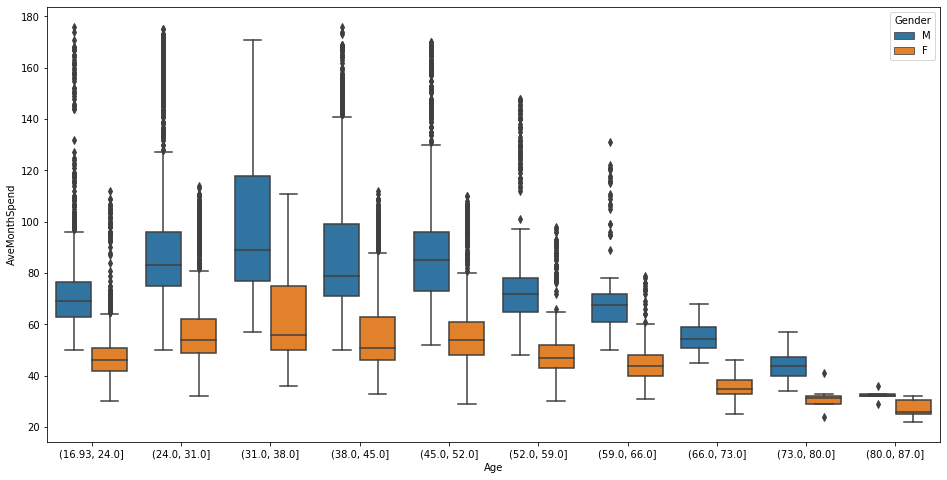

In [14]:
age_seg = pd.cut(data['Age'], bins=10 )
fig = plt.figure(figsize=(16,8))
sns.boxplot(age_seg, 'AveMonthSpend', data=data, hue = 'Gender')

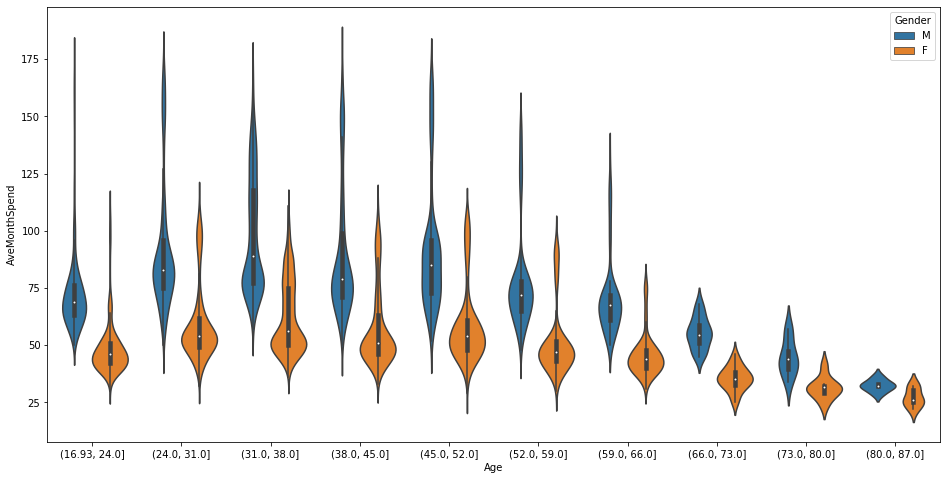

In [15]:
fig = plt.figure(figsize=(16,8))
sns.violinplot(age_seg, 'AveMonthSpend', data=data, hue = 'Gender')

In [16]:
occup = data[['YearlyIncome', 'Occupation']]
occup.groupby('Occupation').median()['YearlyIncome'].sort_values()

Occupation
Manual             21722.0
Clerical           49481.0
Skilled Manual     66471.5
Professional       99058.0
Management        118781.0
Name: YearlyIncome, dtype: float64

In [17]:
data[data['BikeBuyer']==1]['MaritalStatus'].value_counts()

S    3256
M    2199
Name: MaritalStatus, dtype: int64

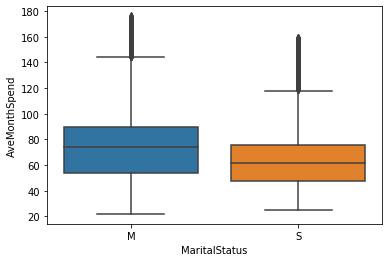

In [18]:
sns.boxplot('MaritalStatus', 'AveMonthSpend', data =data)

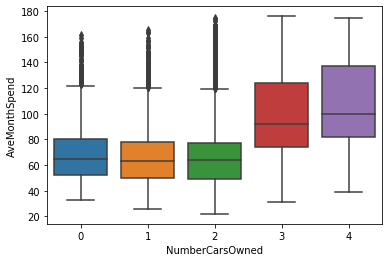

In [19]:
sns.boxplot('NumberCarsOwned', 'AveMonthSpend', data =data)

In [20]:
data[data['BikeBuyer']==1]['Gender'].value_counts()

M    3222
F    2233
Name: Gender, dtype: int64

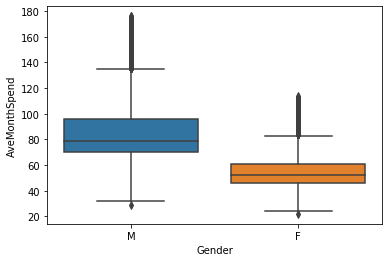

In [21]:
sns.boxplot('Gender', 'AveMonthSpend', data =data)

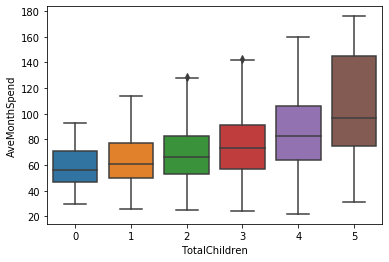

In [22]:
sns.boxplot('TotalChildren', 'AveMonthSpend', data =data)

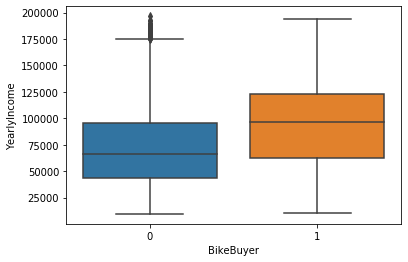

In [23]:
sns.boxplot('BikeBuyer', 'YearlyIncome', data =data)

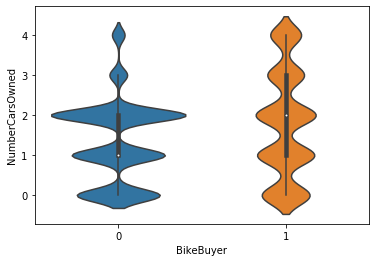

In [24]:
sns.violinplot('BikeBuyer', 'NumberCarsOwned', data =data)

In [25]:
data[data['BikeBuyer']==1]['Occupation'].value_counts()

Professional      2184
Skilled Manual    1135
Management        1016
Clerical           616
Manual             504
Name: Occupation, dtype: int64

In [26]:
data[data['BikeBuyer']==1]['City'].value_counts()

London         149
Paris          102
Chula Vista     59
Beaverton       59
Bellflower      59
              ... 
Casper           1
Cheektowaga      1
Camarillo        1
Byron            1
Clay             1
Name: City, Length: 244, dtype: int64

In [27]:
cat_feat = ['Education','Occupation', 'City', 'StateProvinceName','CountryRegionName', 'Gender', 'MaritalStatus']
dummy_feat = pd.get_dummies(data[cat_feat])
dummy_feat.head()

,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,...,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
0,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [28]:
df = data.drop(cat_feat, axis=1)
df = pd.concat([df, dummy_feat], axis=1)
df.reset_index(inplace =True, drop = True)
df.head()

,CustomerID,BirthDate,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,...,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
0,11000,1966-04-08,1,0,0,2,137947,89,0,31,...,1,0,0,0,0,0,0,1,1,0
1,11001,1965-05-14,0,1,3,3,101141,117,1,32,...,1,0,0,0,0,0,0,1,0,1
2,11002,1965-08-12,1,1,3,3,91945,123,0,32,...,1,0,0,0,0,0,0,1,1,0
3,11003,1968-02-15,0,1,0,0,86688,50,0,29,...,1,0,0,0,0,0,1,0,0,1
4,11004,1968-08-08,1,4,5,5,92771,95,1,29,...,1,0,0,0,0,0,1,0,0,1


In [29]:
y = df['BikeBuyer']
df.drop(['CustomerID', 'BirthDate','BikeBuyer', 'AveMonthSpend'], axis=1, inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30)

In [31]:
columns = X_train.columns

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X = scaler.transform(X_train)

In [33]:
from sklearn.feature_selection import VarianceThreshold
p=0.8
var = VarianceThreshold(threshold=p*(1-p))
reduced_feat = var.fit_transform(scaled_X)
print(sum(var.get_support()))

331


In [34]:
from sklearn.linear_model import LogisticRegression
inner = sklearn.model_selection.KFold(n_splits=10, shuffle=True)
log_reg = LogisticRegression(C=0.1, class_weight='balanced')
selector = sklearn.feature_selection.RFECV(estimator=log_reg,cv = inner, scoring='roc_auc')

In [35]:
selector = selector.fit(reduced_feat, y_train)
print(selector.support_)
print(selector.ranking_)
features = selector.transform(reduced_feat)

[False  True  True  True  True  True  True False False False  True False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [36]:
inside = sklearn.model_selection.KFold(n_splits=10, shuffle=True)
outside = sklearn.model_selection.KFold(n_splits=10, shuffle=True)

In [37]:
param = {'C': [0.0001,0.001, 0.01, 0.1, 1,10,100]}
log_model =LogisticRegression(class_weight='balanced')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=log_model, param_grid=param, cv=inside, scoring='roc_auc', return_train_score=True)
grid.fit(features, y_train)
grid.best_estimator_.C

0.1

In [38]:
from sklearn.model_selection import cross_val_score
cv_estimate = cross_val_score(grid, features, y_train, cv=outside)
cv_estimate

array([0.82849807, 0.83481183, 0.84270248, 0.84833908, 0.85393216,
       0.84348921, 0.85038831, 0.84616574, 0.82971359, 0.82715105])

In [39]:
print(cv_estimate.mean())
print(cv_estimate.std())

0.8405191535100311
0.00925461520791614


In [40]:
mod = LogisticRegression(C=grid.best_estimator_.C, class_weight='balanced')
mod.fit(features, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
scaled_X_test = scaler.transform(X_test)

In [42]:
var_mask = var.get_support()
X_test_var = []
for observe in scaled_X_test:
    select_columns = [observe[i] for i in range(len(var_mask)) if var_mask[i]== True ]
    X_test_var.append(select_columns)

In [43]:
select = selector.support_
X_test_final = []
for observe in X_test_var:
    select_columns = [observe[i] for i in range(len(select)) if select[i]== True ]
    X_test_final.append(select_columns)

In [44]:
prob = mod.predict_proba(X_test_final)
prob

array([[0.69444859, 0.30555141],
       [0.82563322, 0.17436678],
       [0.6613973 , 0.3386027 ],
       ...,
       [0.32580779, 0.67419221],
       [0.19772032, 0.80227968],
       [0.06761065, 0.93238935]])

In [45]:
score = [1 if x>0.5 else 0 for x in prob[:,1] ]

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, score))
print(confusion_matrix(y_test,score))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      3282
           1       0.60      0.70      0.65      1640

    accuracy                           0.75      4922
   macro avg       0.72      0.73      0.73      4922
weighted avg       0.76      0.75      0.75      4922

[[2535  747]
 [ 497 1143]]
